## 2.1. Regresja liniowa

Plik fires_thefts.csv zawiera rzeczywiste dane zebrane przez U.S. Commission on Civil Rights,
przedstawiające liczbę pożarów w danej dzielnicy na tysiąc gospodarstw domowych (pierwsza kolumna)
oraz liczbę włamań w tej samej dzielnicy na tysiąc mieszkańców (druga kolumna).

Stwórz model (regresja liniowa) przewidujący liczbę włamań na podstawie liczby pożarów:

Oblicz parametry θ krzywej regresyjnej za pomocą metody gradientu prostego (gradient descent).
Możesz wybrać wersję iteracyjną lub macierzową algorytmu. Poeksperymentuj z różnymi wartościami
współczynnika szybkości uczenia α:
- α=0.001
- α=0.01
- α=0.1
Wykorzystując uzyskaną krzywą regresyjną przepowiedz liczbę włamań na tysiąc mieszkańców dla dzielnicy,
w której występuje średnio 50, 100, 200 pożarów na tysiąc gospodarstw domowych.

## 2.2. Regresja liniowa (scikit-learn)

Zaimplementuj rozwiązanie zadania 2.1 korzystając z modelu regresji liniowej
z pakietu scikit-learn.

In [12]:
# IMPORT LIBRARIES
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline

# IMPORT THE DATASET
df = pd.read_csv("fires_thefts.csv", header=None)
df = df.rename(columns={0 : 'fires',
                        1 : 'thefts'})
df.head()

,fires,thefts
0,6.2,29
1,9.5,44
2,10.5,36
3,7.7,37
4,8.6,53


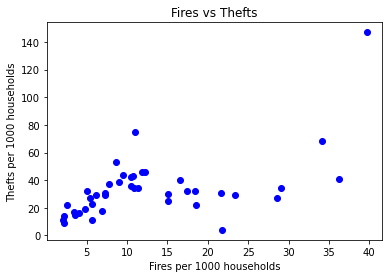

In [13]:
# PLOT DATASET
plt.plot(df.fires, df.thefts, 'bo')
plt.title('Fires vs Thefts')
plt.xlabel('Fires per 1000 households')
plt.ylabel('Thefts per 1000 households')
plt.show()

In [14]:
df[['fires']].head()

,fires
0,6.2
1,9.5
2,10.5
3,7.7
4,8.6


In [16]:
# FITTING SIMPLE LINEAR REGRESSION TO THE SET
X = df[['fires']]
y = df[['thefts']]

regressor = LinearRegression()
regressor.fit(X, y)
regressor.score(X, y)

0.3037346895973584

In [17]:
# PREDICT THE SET RESULTS
y_pred = regressor.predict(X)

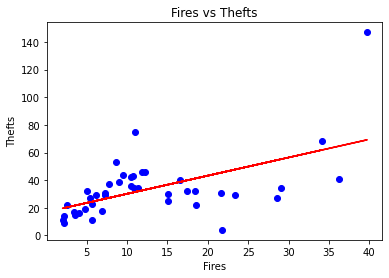

In [18]:
# VISUALISING THE SET RESULTS
plt.scatter(X, y, color = 'blue')
plt.plot(X, regressor.predict(X), color = 'red')
plt.title('Fires vs Thefts')
plt.xlabel('Fires')
plt.ylabel('Thefts')
plt.show()

In [19]:
df2 = pd.DataFrame({'Fires' : [50, 100, 200]})
Z = df2[['Fires']]
Z

,Fires
0,50
1,100
2,200


In [20]:
df3 = pd.DataFrame(regressor.predict(Z))
pred_df = df2.merge(df3, left_index = True, right_index = True)
pred_df = pred_df.rename(columns={0: 'Predicted Thefts'})
pred_df

,Fires,Predicted Thefts
0,50,82.667957
1,100,148.340758
2,200,279.686358
